In [1]:
import torch
import torchvision.models as models
from torchvision import transforms
from custom_transforms import ImgMask
from dataset import FacialImageData
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#device = "cuda" if torch.cuda.is_available() else "cpu"

# Set the device to MPS
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


In [3]:
resnet50 = models.resnet50()
num_classes = 7 ## how many classes in fer?
resnet50.fc = torch.nn.Linear(resnet50.fc.in_features, num_classes)
pretrained = torch.load("./saved_model/resnet50_on_FER.pth")
resnet50.load_state_dict(pretrained["state_dict"])
resnet50.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
resnet50.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
## full face val transform
full_face_val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(
            (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
        )
    ]
)

## mask upper val transform
mask_upper_val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        ImgMask([1, 2]),
        transforms.Normalize(
            (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
        )
    ]
)
## mask lower val transform
mask_lower_val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        ImgMask([3, 4]),
        transforms.Normalize(
            (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
        )
    ]
)
## mask left val transform
mask_left_val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        ImgMask([2, 3]),
        transforms.Normalize(
            (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
        )
    ]
)
## mask right val transform
mask_right_val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        ImgMask([1, 4]),
        transforms.Normalize(
            (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
        )
    ]
)

In [6]:
## create dataset
full_face_val_set = FacialImageData(
    directory="./data/test",
    transform=full_face_val_transform
)

mask_upper_val_set = FacialImageData(
    directory="./data/test",
    transform=mask_upper_val_transform
)

mask_lower_val_set = FacialImageData(
    directory="./data/test",
    transform=mask_lower_val_transform
)

mask_left_val_set = FacialImageData(
    directory="./data/test",
    transform=mask_left_val_transform
)

mask_right_val_set = FacialImageData(
    directory="./data/test",
    transform=mask_right_val_transform
)

In [7]:
## create validation loader

VAL_BATCH_SIZE = 100
full_face_val_loader = DataLoader(
    full_face_val_set,
    batch_size=VAL_BATCH_SIZE,
    shuffle=False,
    num_workers=2
)

mask_upper_val_loader = DataLoader(
    mask_upper_val_set,
    batch_size=VAL_BATCH_SIZE,
    shuffle=False,
    num_workers=2
)
mask_lower_val_loader = DataLoader(
    mask_lower_val_set,
    batch_size=VAL_BATCH_SIZE,
    shuffle=False,
    num_workers=2
)
mask_left_val_loader = DataLoader(
    mask_left_val_set,
    batch_size=VAL_BATCH_SIZE,
    shuffle=False,
    num_workers=2
)
mask_right_val_loader = DataLoader(
    mask_right_val_set,
    batch_size=VAL_BATCH_SIZE,
    shuffle=False,
    num_workers=2
)

In [8]:
metrics_dict = {
    "full face": {'accuracy': [], 'precision': [], 'recall': [],
                   'f1': [], 'auc': [], 'loss': []},
    "upper mask": {'accuracy': [], 'precision': [], 'recall': [],
                   'f1': [], 'auc': [], 'loss': []},
    "lower mask": {'accuracy': [], 'precision': [], 'recall': [],
                   'f1': [], 'auc': [], 'loss': []},
   "left mask": {'accuracy': [], 'precision': [], 'recall': [],
                   'f1': [], 'auc': [], 'loss': []},
    "right mask": {'accuracy': [], 'precision': [], 'recall': [],
                   'f1': [], 'auc': [], 'loss': []},
}

In [9]:
import torch.nn.functional as F
import pandas as pd

## validate
loss_func = nn.CrossEntropyLoss().to(device)
set_names = ["full_face", "upper_mask", "lower_mask", "left_mask", "right_mask"]
loaders = [full_face_val_loader, mask_upper_val_loader, mask_lower_val_loader, mask_left_val_loader, mask_right_val_loader]

for i, loader in enumerate(loaders):
    set_name = set_names[i]
    print(set_name)
    
    # Container for the probabilities for the current loader
    probabilities = []

    with torch.no_grad():
        val_loss = 0
        total_examples = 0
        correct_examples = 0

        for batch_idx, (inputs, targets) in enumerate(loader):
            inputs, targets = inputs.to(device), targets.to(device)
            out = resnet50(inputs)
            loss = loss_func(out, targets)

            probs = F.softmax(out, dim=1)
            probabilities.extend(probs.cpu().numpy())  # Move probs to CPU and convert to numpy

            _, predicted = torch.max(out, 1)
            correct = predicted.eq(targets).sum()
            val_loss += loss.item()
            total_examples += targets.size(0)
            correct_examples += correct.item()

        avg_loss = val_loss / len(loader)
        avg_acc = correct_examples / total_examples
        print("Validation loss: %.4f, Validation accuracy: %.4f" % (avg_loss, avg_acc))

    # Convert to a NumPy array for easier manipulation
    probabilities_np = np.array(probabilities)
    
    # Save to a CSV file
    pd.DataFrame(probabilities_np).to_csv(f"./data/{set_name}_probabilities.csv", index=False)        

full_face
Validation loss: 0.9734, Validation accuracy: 0.6649
upper_mask
Validation loss: 1.9196, Validation accuracy: 0.4489
lower_mask
Validation loss: 2.0277, Validation accuracy: 0.2753
left_mask
Validation loss: 1.6123, Validation accuracy: 0.4388
right_mask
Validation loss: 1.7415, Validation accuracy: 0.4101


In [10]:
# Load probabilities
full_face_prob = pd.read_csv('./data/full_face_probabilities.csv')
upper_mask_prob = pd.read_csv('./data/upper_mask_probabilities.csv')
lower_mask_prob = pd.read_csv('./data/lower_mask_probabilities.csv')
left_mask_prob = pd.read_csv('./data/left_mask_probabilities.csv')
right_mask_prob = pd.read_csv('./data/right_mask_probabilities.csv')

# Load test labels
test_df = pd.read_csv('./data/test_data.csv')

full_face_prob.shape, upper_mask_prob.shape, lower_mask_prob.shape, left_mask_prob.shape, right_mask_prob.shape, test_df.shape

((7178, 7), (7178, 7), (7178, 7), (7178, 7), (7178, 7), (7178, 2))

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Instantiate the encoder
label_encoder = LabelEncoder()

class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Fit the encoder on all possible labels to establish a mapping
label_encoder.fit(class_names)

test_df['encoded_labels'] = label_encoder.transform(test_df['labels'])

true_labels = test_df['labels'].values

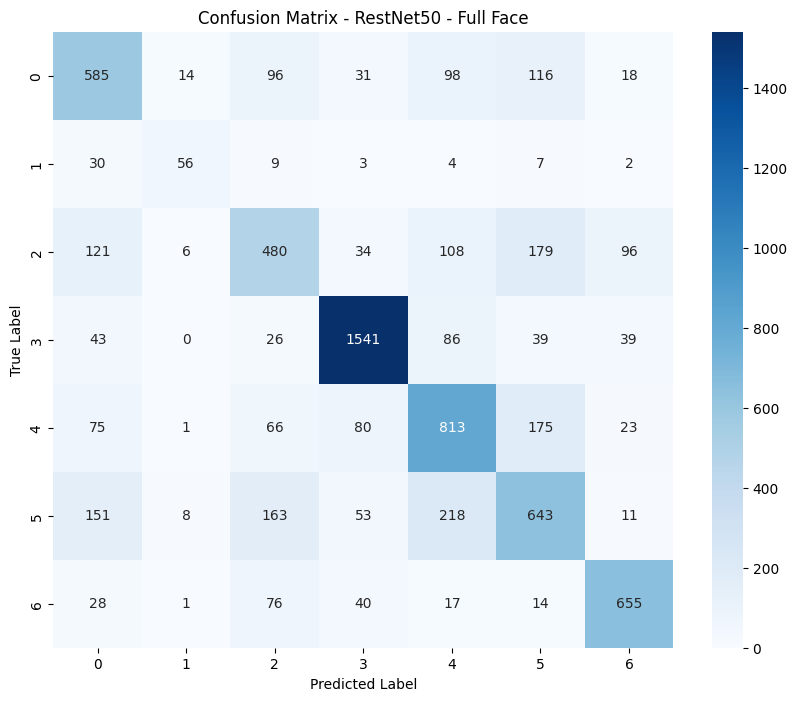

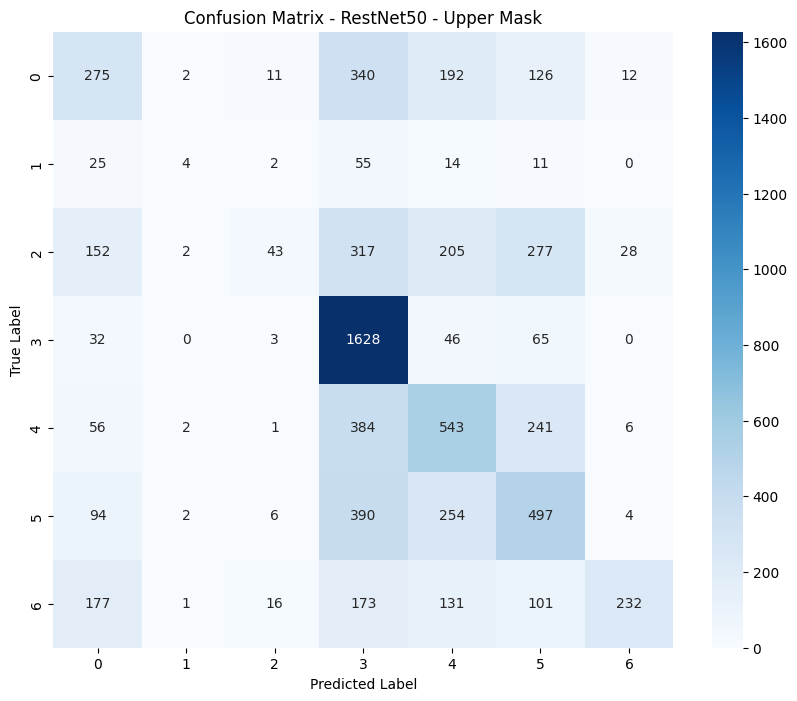

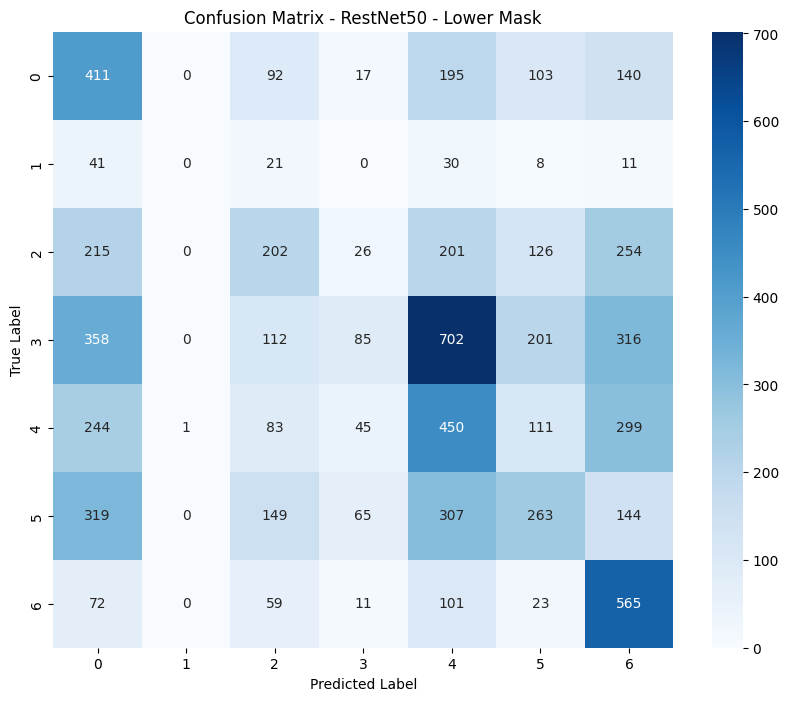

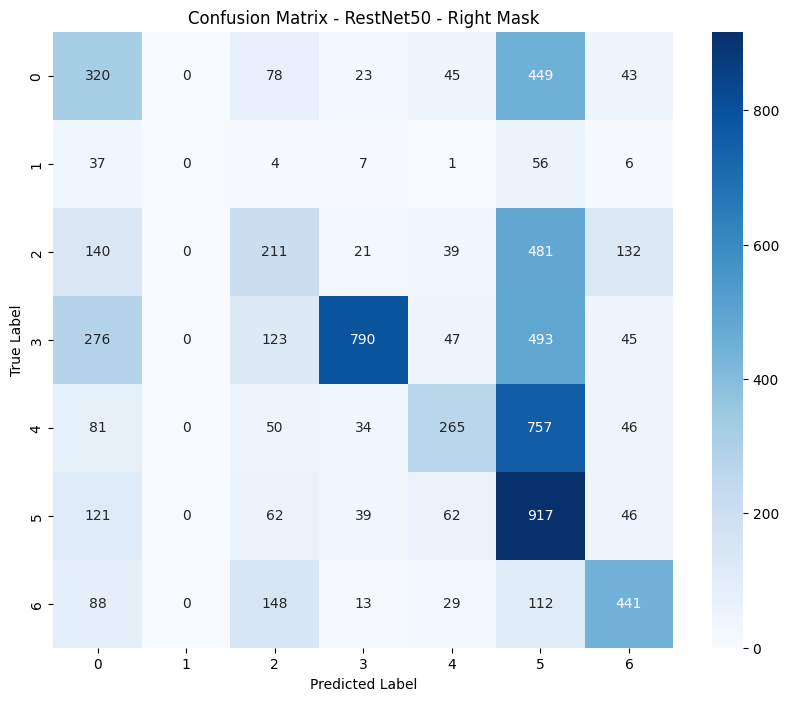

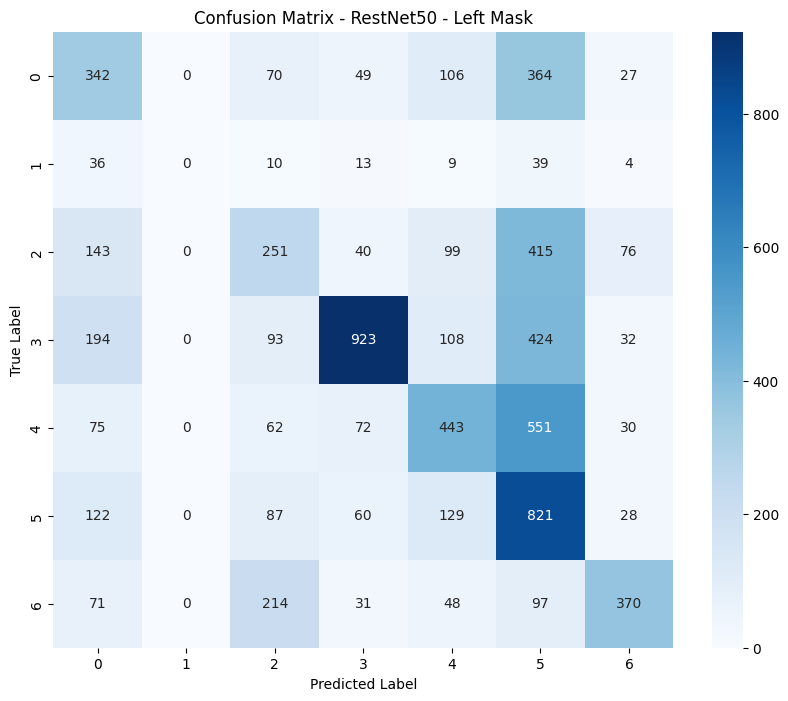

In [12]:
# List of our probability DataFrames
prob_arrays = [
    full_face_prob.values,
    upper_mask_prob.values,
    lower_mask_prob.values,
    right_mask_prob.values,
    left_mask_prob.values
]

# Names for our experiments
exp_names = ["Full Face", "Upper Mask", "Lower Mask", "Right Mask", "Left Mask"]

# Loop through each experiment and plot the confusion matrix
for i, prob_array in enumerate(prob_arrays):
    predicted_classes = np.argmax(prob_array, axis=1)
    decoded_predictions = label_encoder.inverse_transform(predicted_classes)
    
    # Generate the confusion matrix
    cm = confusion_matrix(true_labels, decoded_predictions)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - RestNet50 - {exp_names[i]}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'../03_results/plots/confusion_matrix_{exp_names[i]}.png')
    plt.show()

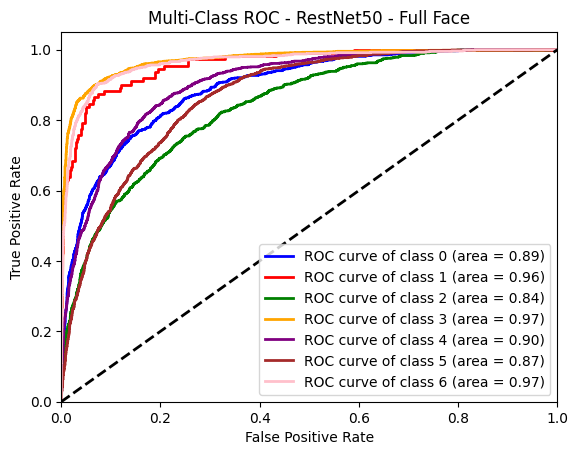

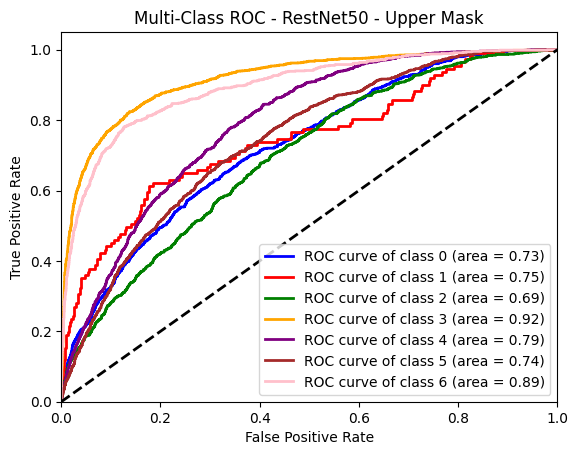

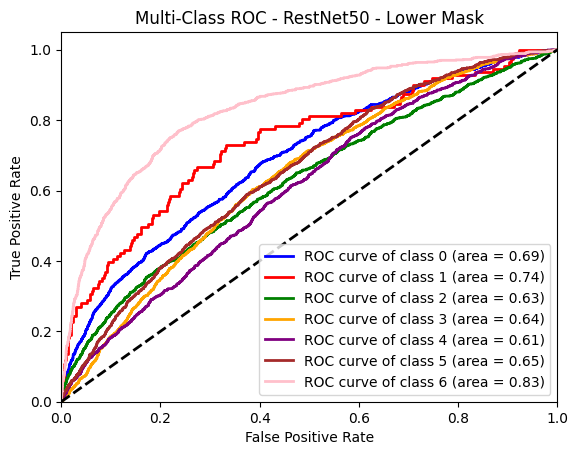

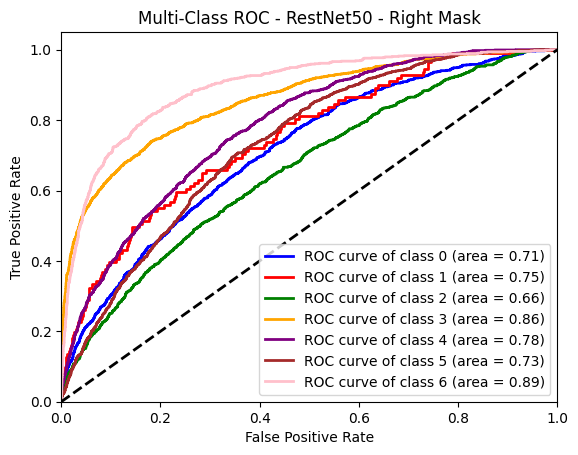

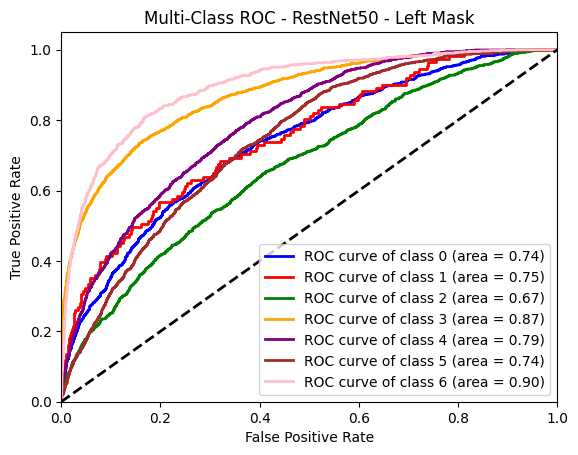

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

classes=[0, 1, 2, 3, 4, 5, 6]
true_labels = test_df['encoded_labels'].values
y_true = label_binarize(true_labels, classes=classes)
n_classes = y_true.shape[1]


# Iterate through each set of predicted probabilities
for exp_name, predicted_probs in zip(exp_names, prob_arrays):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves for the current experiment
    plt.figure()
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi-Class ROC - RestNet50 - {exp_name}')
    plt.legend(loc="lower right")
    plt.savefig(f'../03_results/plots/Multi-Class ROC - RestNet50 - {exp_name}.png')
    plt.show()


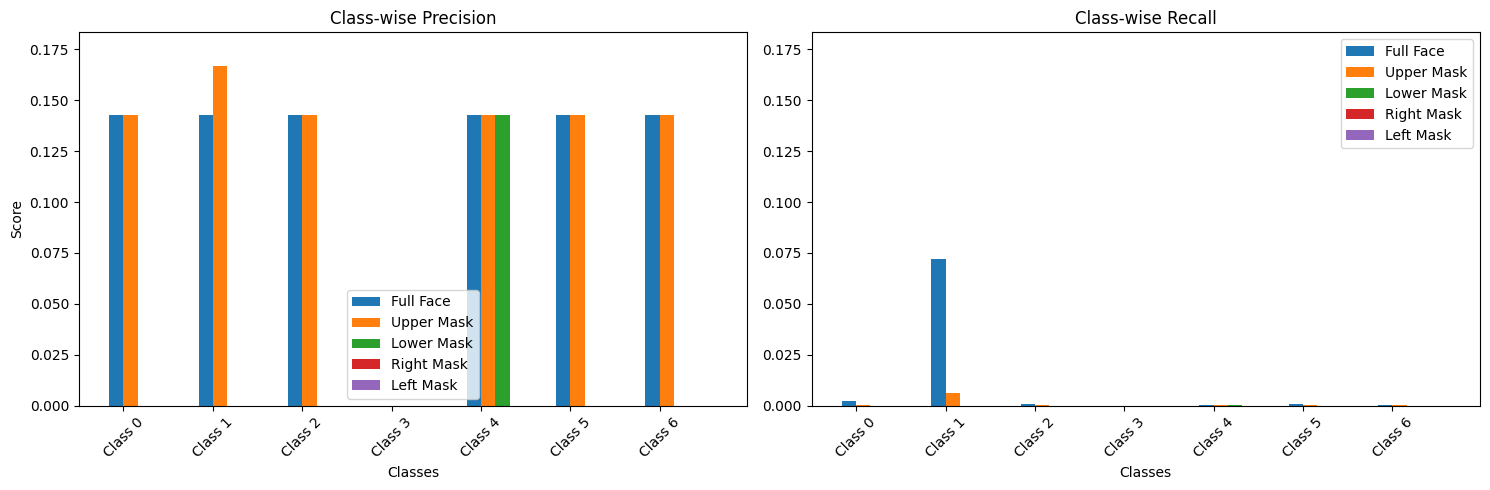

Precision: [[0.14285714 0.14285714 0.14285714 0.         0.14285714 0.14285714
  0.14285714]
 [0.14285714 0.16666667 0.14285714 0.         0.14285714 0.14285714
  0.14285714]
 [0.         0.         0.         0.         0.14285714 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]
Recall: [[0.00208768 0.07207207 0.00083705 0.         0.00011586 0.00091649
  0.00017191]
 [0.00029824 0.00600601 0.00027902 0.         0.00023172 0.00022912
  0.00017191]
 [0.         0.         0.         0.         0.00011586 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


In [14]:
from sklearn.metrics import precision_score, recall_score


def plot_precision_recall_by_class(exp_names, true_labels, prob_arrays, classes):
    y_true = label_binarize(true_labels, classes=classes)
    
    n_classes = len(classes)
    precision_results = np.zeros((len(exp_names), n_classes))
    recall_results = np.zeros((len(exp_names), n_classes))
    
    for i, predicted_probs in enumerate(prob_arrays):
        y_pred = np.argmax(predicted_probs, axis=1)
        for j in range(n_classes):
            class_indices = y_true[:, j] == 1
            precision_results[i, j] = precision_score(y_true[class_indices, j], y_pred[class_indices], average='macro', zero_division=0)
            recall_results[i, j] = recall_score(y_true[class_indices, j], y_pred[class_indices], average='macro', zero_division=0)
    
    # Plot Precision and Recall for each class
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Determine the maximum score to set y-axis limits
    max_precision = precision_results.max()
    max_recall = recall_results.max()
    y_max = max(max_precision, max_recall) * 1.1  # add a little headroom

    # Plot each metric
    for idx, metric in enumerate(['precision', 'recall']):
        axes[idx].set_title(f'Class-wise {metric.capitalize()}')
        for i, exp_name in enumerate(exp_names):
            if metric == 'precision':
                axes[idx].bar(np.arange(n_classes) + i*(0.8/len(exp_names)), precision_results[i], width=0.8/len(exp_names), label=f'{exp_name}')
            else:
                axes[idx].bar(np.arange(n_classes) + i*(0.8/len(exp_names)), recall_results[i], width=0.8/len(exp_names), label=f'{exp_name}')
        axes[idx].set_ylim(0, y_max)  # Set the y-axis limits to the max score found
        axes[idx].set_xticks(np.arange(n_classes) + 0.8/(2*len(exp_names)))
        axes[idx].set_xticklabels([f'Class {c}' for c in classes], rotation=45)
        axes[idx].set_xlabel('Classes')
        if idx == 0:
            axes[idx].set_ylabel('Score')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()

    print(f'Precision: {precision_results}')
    print(f'Recall: {recall_results}')

plot_precision_recall_by_class(exp_names, true_labels, prob_arrays, classes)


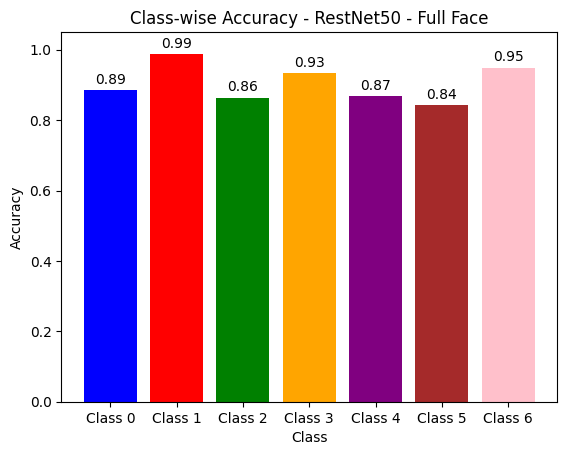

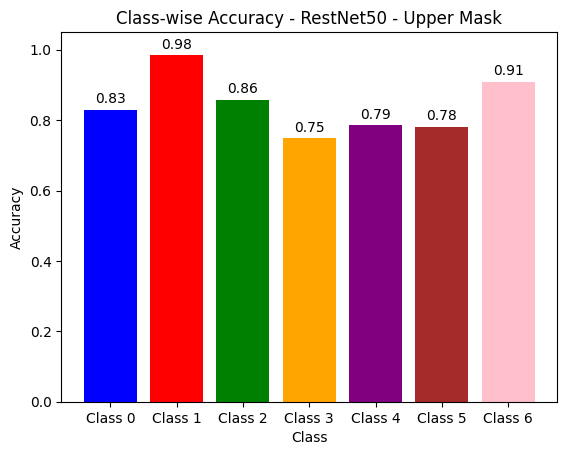

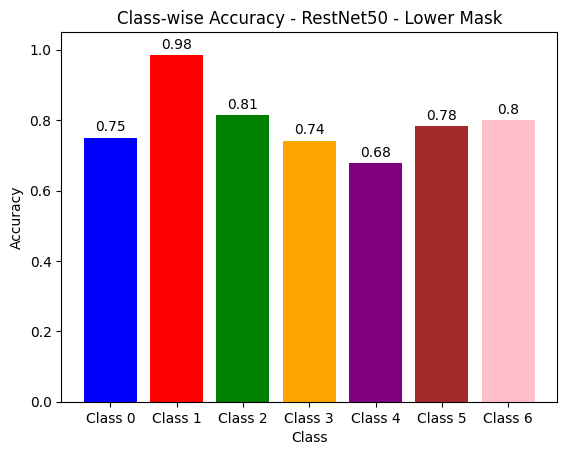

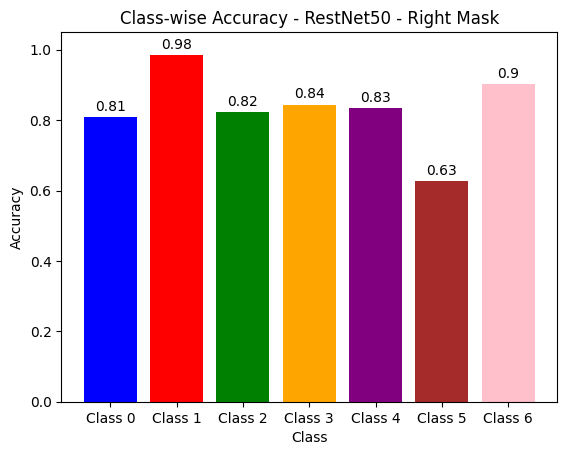

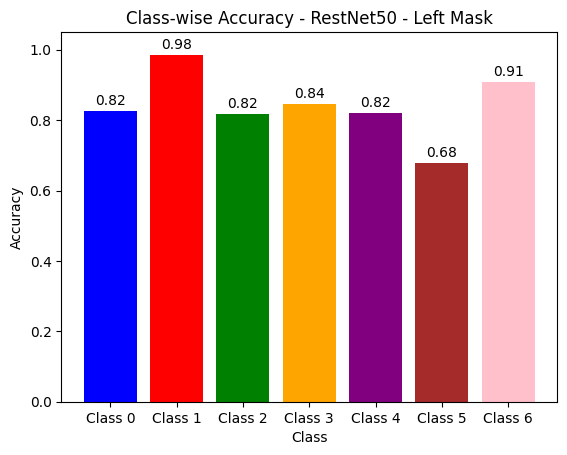

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

true_labels = test_df['encoded_labels'].values
y_true = label_binarize(true_labels, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y_true.shape[1]

# Iterate through each set of predicted probabilities
for exp_name, predicted_probs in zip(exp_names, prob_arrays):
    # Initialize the dictionary to store accuracy for each class
    class_accuracies = dict()

    # Compute accuracy for each class
    for i in range(n_classes):
        # Get predictions for the current class
        y_pred = np.argmax(predicted_probs, axis=1) == i
        y_true_class = y_true[:, i]
        
        # Calculate accuracy
        class_accuracies[i] = accuracy_score(y_true_class, y_pred)

    # Plot accuracy for each class
    plt.figure()
    classes = range(n_classes)
    accuracies = [class_accuracies[class_id] for class_id in classes]
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']
    
    bars = plt.bar(classes, accuracies, color=colors)

    # Add text annotations on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.title(f'Class-wise Accuracy - RestNet50 - {exp_name}')
    plt.xticks(classes, [f'Class {i}' for i in classes])
    plt.ylim([0.0, 1.05])  # Extend y-axis to show max accuracy of 1.0 clearly
    plt.savefig(f'../03_results/plots/Class-wise Accuracy - RestNet50 - {exp_name}.png')
    plt.show()


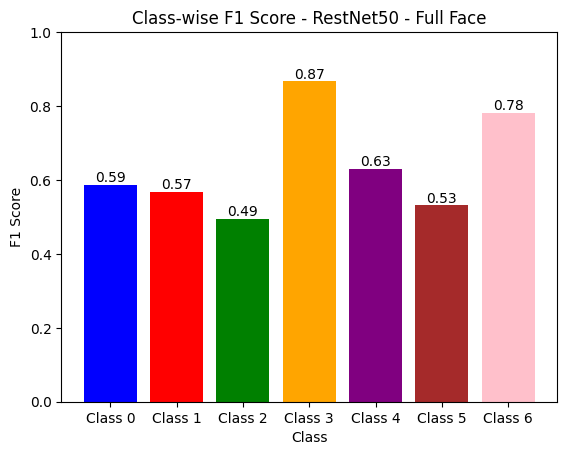

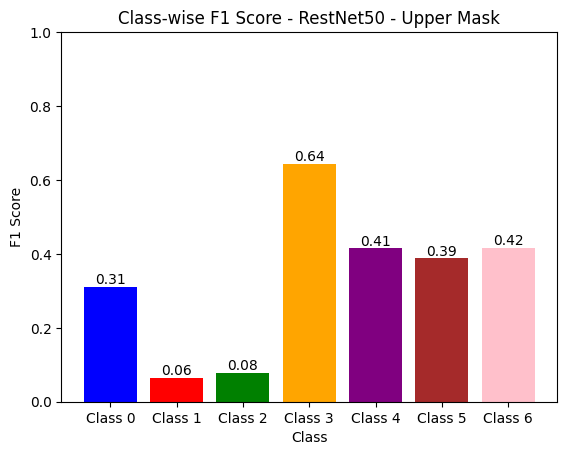

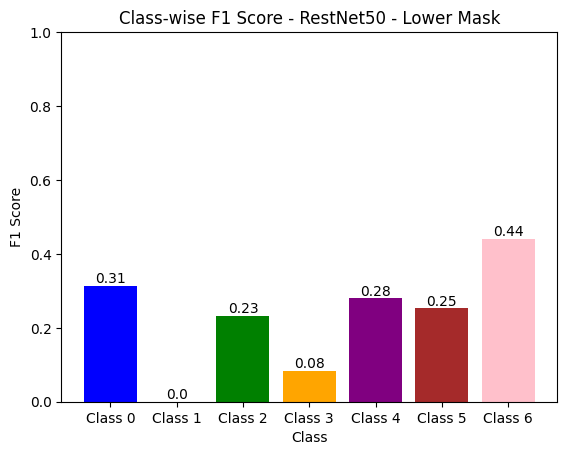

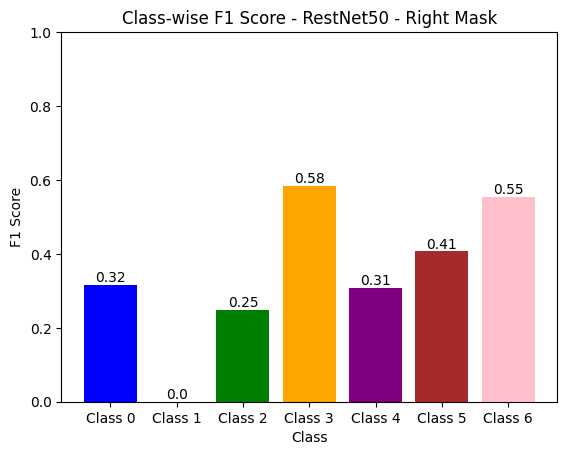

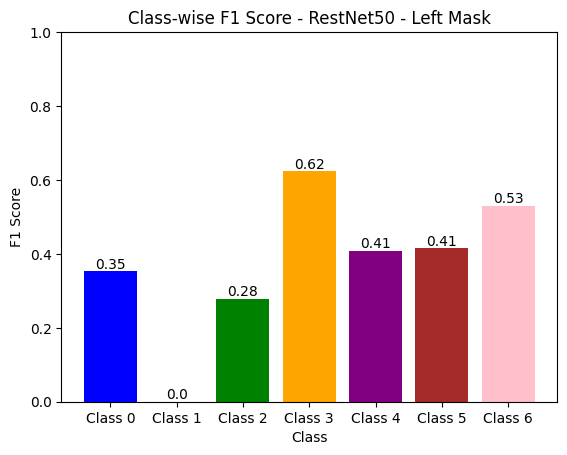

In [24]:
from sklearn.metrics import f1_score

# Setup of our data
true_labels = test_df['encoded_labels'].values

# Iterate through each set of predicted probabilities
for exp_name, predicted_probs in zip(exp_names, prob_arrays):
    # Compute F1 score for each class
    y_pred = np.argmax(predicted_probs, axis=1)
    f1_scores = [f1_score(y_true[:, i], y_pred == i, zero_division=0) for i in range(n_classes)]

    # Plot F1 scores for each class
    plt.figure()
    classes = range(n_classes)
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']
    
    bars = plt.bar(classes, f1_scores, color=colors)
    plt.xlabel('Class')
    plt.ylabel('F1 Score')
    plt.title(f'Class-wise F1 Score - RestNet50 - {exp_name}')
    plt.xticks(classes, [f'Class {i}' for i in classes])
    plt.ylim(0, 1)  # F1 Score ranges from 0 to 1

    # Adding the text labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
       
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom')
    plt.savefig(f'../03_results/plots/Class-wise F1 Scores - RestNet50 - {exp_name}.png')
    plt.show()


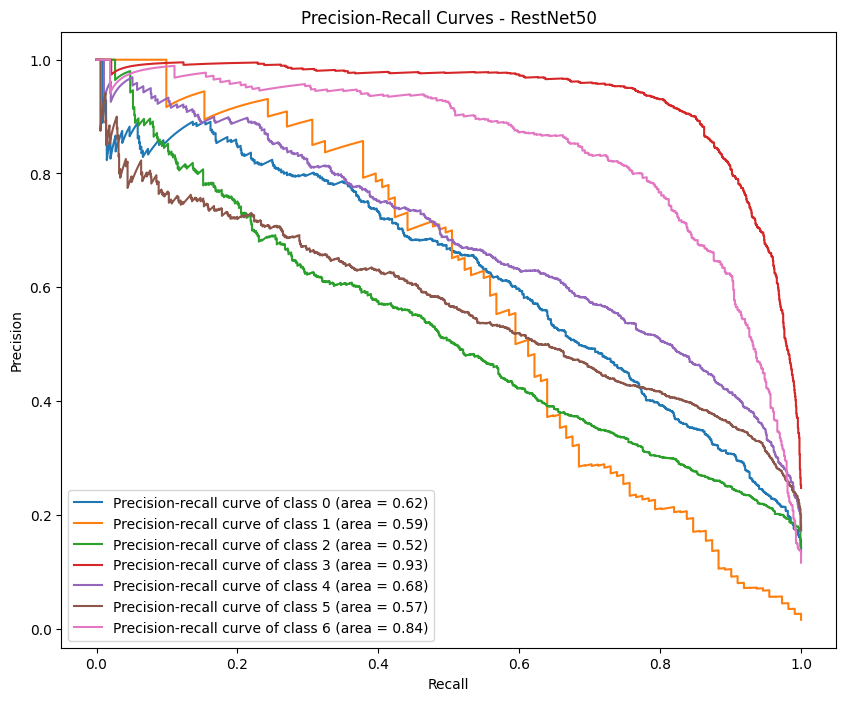

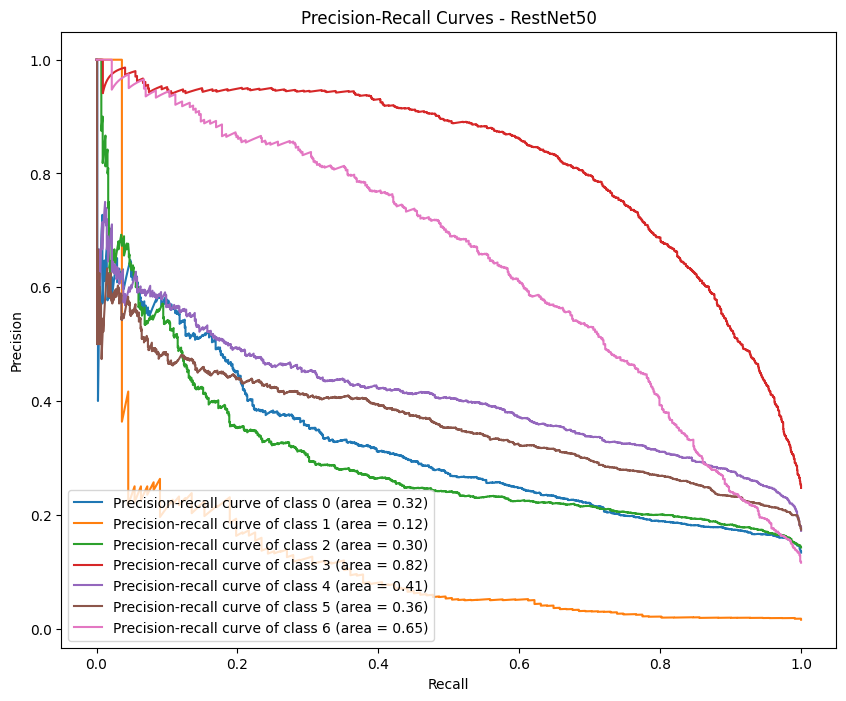

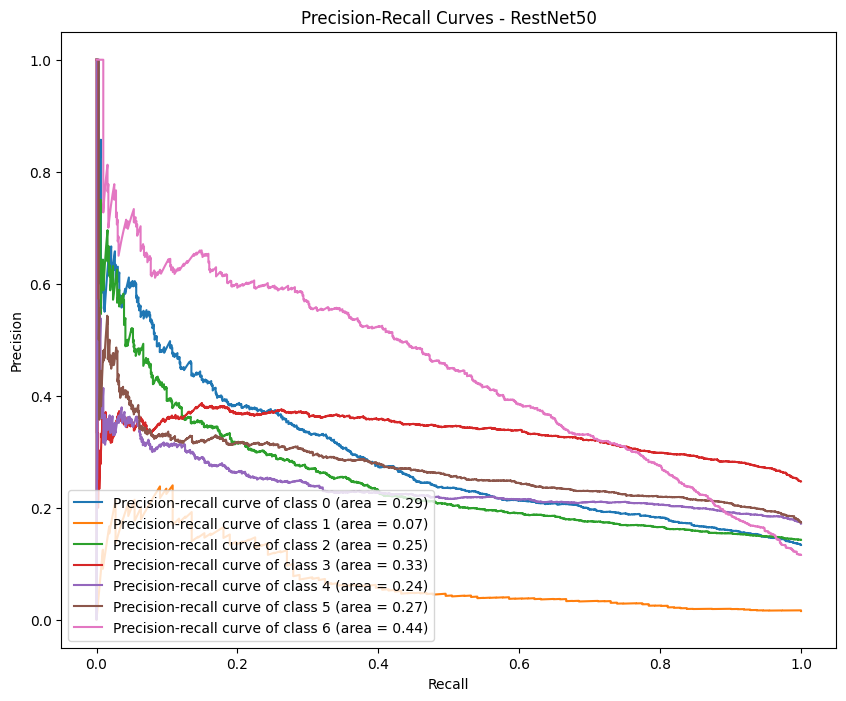

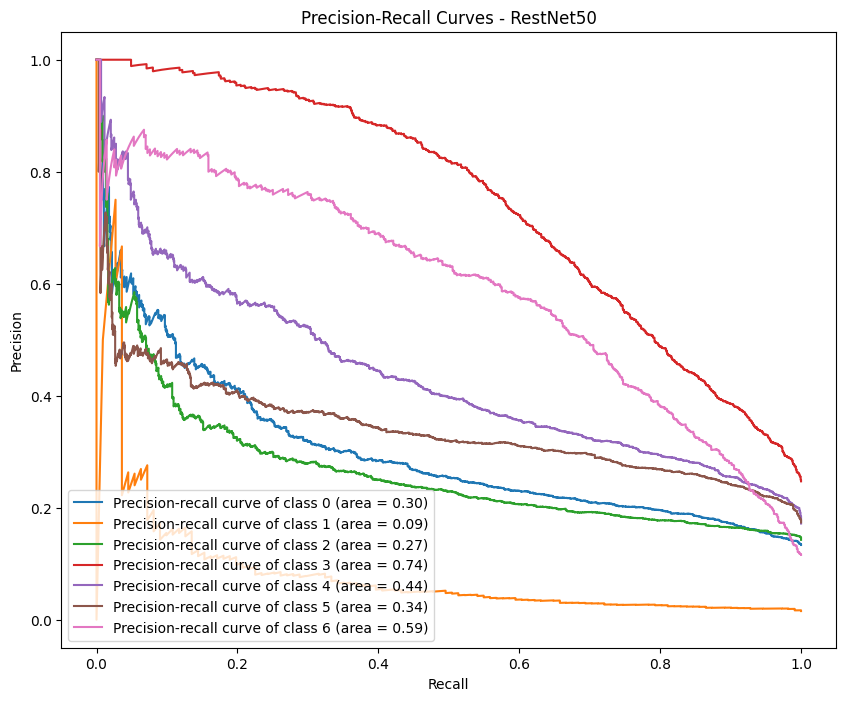

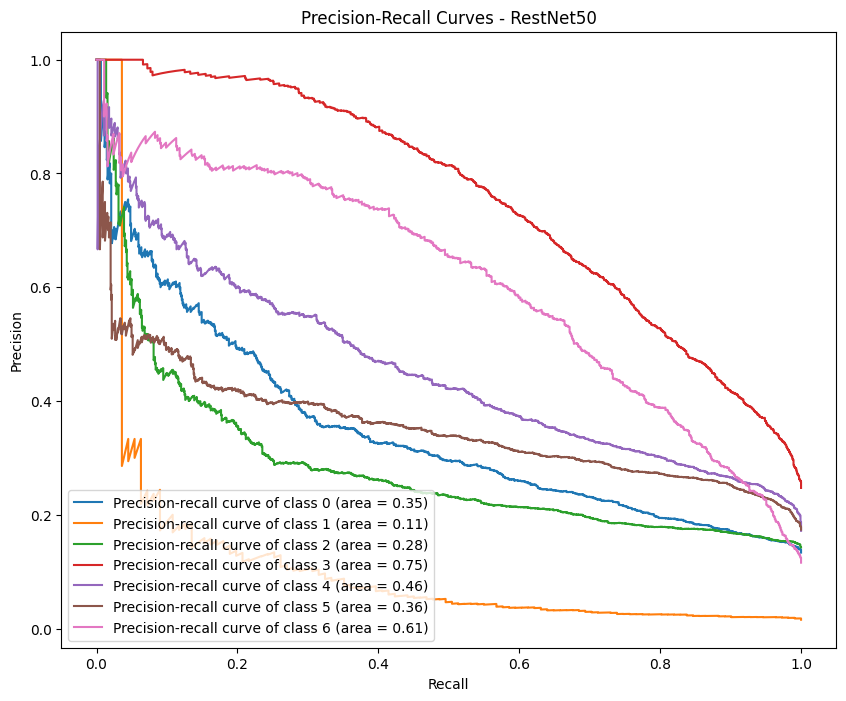

In [31]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

true_labels = test_df['encoded_labels'].values
y_true = label_binarize(true_labels, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y_true.shape[1]
  
# Iterate through each set of predicted probabilities
for exp_name, predicted_probs in zip(exp_names, prob_arrays):
    plt.figure(figsize=(10, 8))
    
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(classes)):
        precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], predicted_probs[:, i])
        average_precision[i] = average_precision_score(y_true[:, i], predicted_probs[:, i])

    # Plot the precision-recall curves
    for i in range(len(classes)):
        plt.plot(recall[i], precision[i], label=f'Precision-recall curve of class {i} (area = {average_precision[i]:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.title('Precision-Recall Curves - RestNet50')
    plt.savefig(f'./results/precision_recall_curve_{exp_name}.png')
    plt.show()